# Input/output NERDSS Python Library (ioNERDSS) Tutorial

## 1. Setup NERDSS

Clone NERDSS repository from Github (https://github.com/mjohn218/nerdss_development). Refer to the user guide and install NERDSS on local device. After installation NERDSS, a executable file named 'nerdss.exe' will be found.

## 2. Setup self-assembly model for Platonic sold (dodecahedron as example)

Platonic solid is a series of 3-dimensional geometry solid that each face is congruent and all faces are regular polygons. Besides, same number of faces will meet at each vertex. The platonic solids can be considered as the most regular 3-D solids because all of their properties are regular. The length of each edge, the angle between each edge and between each face are all identical. There are 5 kinds of Platonic solids existing and dodecahedron will be introduced as an example.

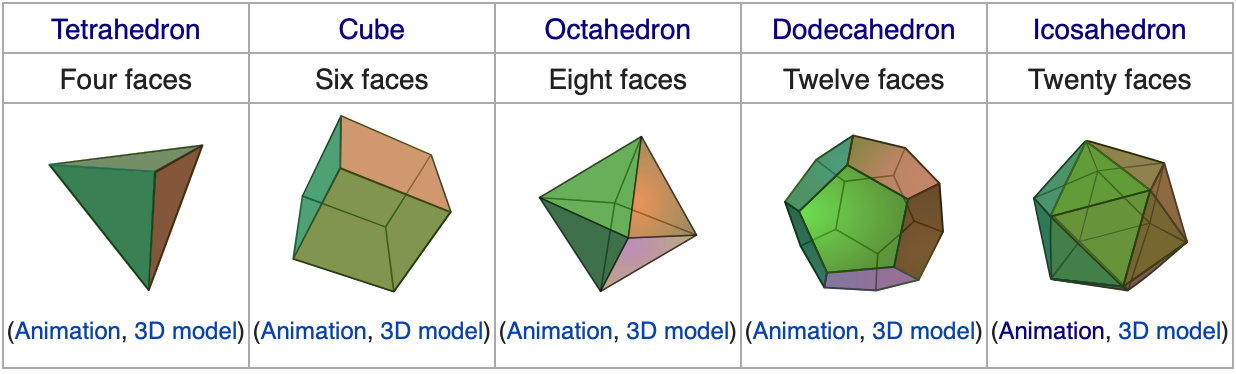

Dodecahedron possesses 12 faces, 20 vertex and 30 edges. The coordinates of each vertex is given as follows:

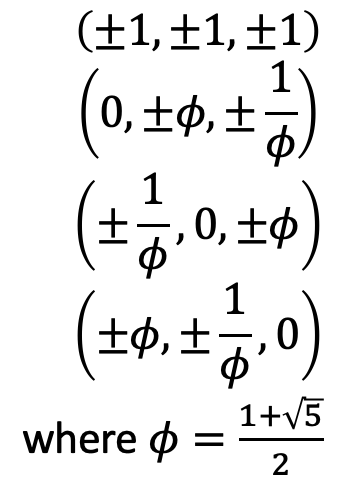

By simply multiplying the above coordinates by a fixed factor, the effect of changing the size of the model in equal proportions can be achieved, thus allowing the diameter of the model to be adjusted.

... ...

## 3. Library installation

The ioNERDSS library in uploaded onto the official Python Package Index (https://pypi.org/), where all information about this package can be found.

To install ioNERDSS library, simply run below in system command line:

To upgrade ioNERDSS, run below in system command line:

## 4. Model Creation

After installing latest version of ioNERDSS package, open Jupyter Notebook or other prefered IDE, import ioNERDSS package as follows.

In [1]:
import ioNERDSS as io

Then, choose the desired Platonic solid model and run corresponding function with reasonable radius and sigma value input. The name of function is 'NameOfPlatonicSolid_Face/Vert(radius, sigma)'.

In [2]:
io.dode_face(radius = 40.0, sigma = 1.0)

File writing complete!


0

After running this function, a message indicating 'File writing complete!' will show up and two input files will be generated in the same directory with your current Python file. One is 'parm.inp' and the other is 'XXXX.mol' depending on the model used. Also, if the default built-in parameters (e.g. trajWrite, pdbWrite, onRate3Dka, offRatekb, etc.) need to be modified, users can manually change then accordingly.

Also, avoid generating multiple input files in the same path, or the older .inp file will be overwritten by the newly created one.

## 5. Running simulation

To run the simulation, copy the 'nerdss.exe' file generated in the first step in the same directory as .inp and .mol file. Open the same directory in terminal and run command below to start simulation:

## 6. Analysis Tools

There are also a number of functions for analysing the output of NERDSS. For detailed description and input requirements, please refer to the 'output_vis_user_guide.doc' inside io_nerdss Github repository.

The model for all simulation results used for the analysis below is dodecahedron with face as COM and the only modification is that onRate3Dka and offRatekb are all reduced by 10 times.

### 6.1 General histogam

This function enables users to obtain a histogram during a certain time period of selected species.

Start time(s):  0.9
End time(s):  1.0


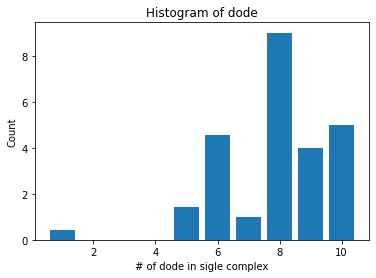

0

In [3]:
io.hist(FileName = 'histogram_complexes_time.dat', InitialTime = 0.9, FinalTime = 1.0, SpeciesName = 'dode')

### 6.2 Maximum monomers in single comlex vs. time plot

This function enables users to obtain a plot indicating maximum number of monomers in single complex molecule during a certain time period.

Start time(s):  0.0
End time(s):  1.0


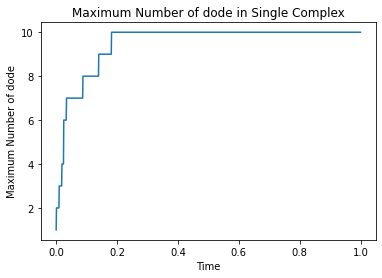

0

In [4]:
io.max_complex(FileName = 'histogram_complexes_time.dat', \
               InitialTime = -1.0, FinalTime = -1.0, SpeciesName = 'dode')

### 6.3 Mean monomoers in sigle complex vs. time plot

This function enables users to obtain a plot indicating mean number of monomers in single complex molecule during a certain time period.

Start time(s):  0.0
End time(s):  1.0
Exclude Number:  0


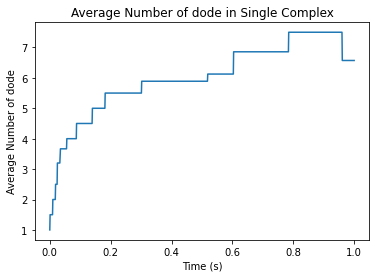

0

In [5]:
io.mean_complex(FileName = 'histogram_complexes_time.dat', \
               InitialTime = -1.0, FinalTime = -1.0, SpeciesName = 'dode')

### 6.4 ‘histogram_complexes_time.dat’ file to pandas.DataFrame

This function enables users to convert the raw .dat file to a data frame in python pandas package for multi-species system. Each column in the data frame includes the simulation time and selected occurrences of species during the simulation; each row is separated by a different simulation time.

This function will run in a low speed when the number of data point is large and needs further optimization.

In [6]:
io.hist_to_df(FileName = 'histogram_complexes_time.dat', SpeciesNameList=[])

,Time(s),dode: 1.,dode: 2.,dode: 3.,dode: 4.,dode: 6.,dode: 7.,dode: 5.,dode: 8.,dode: 9.,dode: 10.
0,0.000,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.001,196.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.002,190.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.003,188.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.004,186.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
996,0.996,1.0,0.0,0.0,0.0,4.0,1.0,2.0,9.0,4.0,5.0
997,0.997,1.0,0.0,0.0,0.0,4.0,1.0,2.0,9.0,4.0,5.0
998,0.998,1.0,0.0,0.0,0.0,4.0,1.0,2.0,9.0,4.0,5.0
999,0.999,1.0,0.0,0.0,0.0,4.0,1.0,2.0,9.0,4.0,5.0


### 6.5 3D-histogram vs. time

This function enables users to generate 3D histogram representing the number of monomers in single complex as simulation time develops. The x-axis is the number of monomers, y-axis is the averaged time and z-axis is the relative occurrence probabilities.

Since Jupyter Notebook does not support 3D rotation of output images, this function is recommended to be run under a non-Jupyter Notebook IDE.

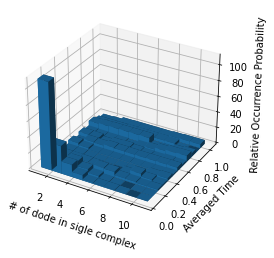

0

In [7]:
io.hist_3d_time(FileName = 'histogram_complexes_time.dat', \
               InitialTime = -1.0, FinalTime = -1.0, SpeciesName = 'dode', TimeBins = 12)

### 6.6 Heatmap of general histogram progression vs. time

This function enables users to generate 2D histogram of numerical distribution of different N-mers vs. time. The x-axis is the distribution of number of monomers in single complex and y-axis is the time period. The color in each box indicates the number of corresponding N-mers when corresponding time period is reached.

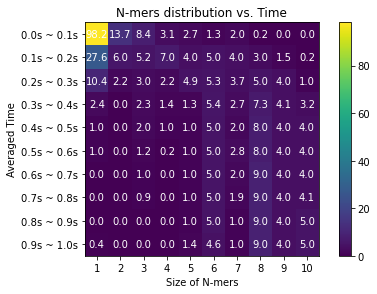

0

In [8]:
io.hist_time_heatmap(FileName = 'histogram_complexes_time.dat', \
               InitialTime = -1.0, FinalTime = -1.0, SpeciesName = 'dode', TimeBins = 10, ShowNum = True)

### 6.7 Heatmap: number of total count of monomers inside n-mers vs. time

This function enables users to generate 2D histogram of total count of monomers in different N-mers vs. time. The x-axis is the number of monomers in single complex and y-axis is the time period. The color in each box indicates the total number of corresponding monomers in N-mers when corresponding time period is reached.

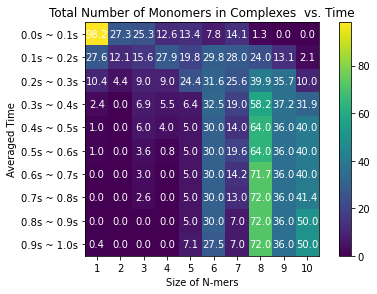

0

In [9]:
io.hist_time_heatmap_mono_count(FileName = 'histogram_complexes_time.dat', \
               InitialTime = -1.0, FinalTime = -1.0, SpeciesName = 'dode', TimeBins = 10, ShowNum = True)

### 6.8 Heatmap: fractions of monomers forming n-mers vs. time

This function enables users to generate 2D histogram of fractions of monomers forming different N-mers vs. time. The x-axis is the number of monomers in single complex and y-axis is the time period. The color in each box indicates the fraction of monomers forming corresponding N-mers when corresponding time period is reached.

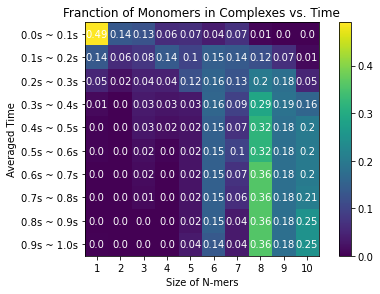

0

In [10]:
io.hist_time_heatmap_fraction(FileName = 'histogram_complexes_time.dat', \
               InitialTime = -1.0, FinalTime = -1.0, SpeciesName = 'dode', TimeBins = 10, ShowNum = True)

### 6.9 Locate position for certain size of complex by PDB file

This function enables users to locate specific complexes of certain size from a PDB file after simulation. The result will be output as a separated file named “output_file.pdb” containing only the desired complex.

Reading only the PDB file slows down the function compared to reading the 'restart.dat' file, because the function needs to calculate the distance between all reactive atoms that can be reacted based on the reaction information to determine whether they are bound or not. Therefore, this function is universal but runs slowly in time.

For the above reasons, this tutorial will only show how to use this function but without running it.

In [11]:
# io.locate_position_PDB(FileNamePdb = '9999999.pdb',NumList = [10], \
#                        FileNameInp = 'parm.inp', BufferRatio = 0.01)

### 6.10 Locate position for certain size of complex by 'restart.dat' file

This function enables users to locate specific complexes of certain size from a PDB file along with ‘restart.dat’ file after simulation. The result will be output as a separated file named “output_file.pdb” containing only the desired complex.

The advantage of reading the 'restart.dat' file is that the file directly stores the binding information of each complex in the system and can be used directly, so the function runs faster; however, the function is not universal, if the 'restart.dat ' file's write logic changes, then this function will no longer work.

In [12]:
io.locate_position_restart(FileNamePdb = '9999999.pdb', NumList = [10], FileNameRestart = 'restart.dat')

Reading restart.dat......
The total number of complexes is 26
Reading files complete!
Reading PDB files......
Reading files complete!
Finding complexes......
Finding complexes complete!
Writing new PDB files......
PDB writing complete!(named as output_file.pdb)


0

## 7. Developer user guide